In [1]:
from fenics import *
import matplotlib.pyplot as plt

## Mathematical problem formulation
Most books on a programming language start with a “Hello, World!” program. That is, one is curious about how a very fundamental task is expressed in the language, and writing a text to the screen can be such a task. In the world of finite element methods for PDEs, the most fundamental task must be to solve the Poisson equation. Our counterpart to the classical “Hello, World!” program therefore solves
$$-\nabla^2u(x)=f(x),\quad x \in \Omega\tag 1$$
$$u(x)=u_D(x),\quad x \in \partial\Omega\tag 2$$
$$\underbrace{\nabla}_{\text{divergence}} . \underbrace{\nabla}_{\text{gradient}}$$
Here, $u=u(x)$ is the unknown function, $f=f(x)$ is a prescribed function, $\nabla^2$ is the Laplace operator, $\Omega$ is the spatial domain, and $\partial\Omega$ is the boundary of $\Omega$. A stationary PDE like this, together with a complete set of boundary conditions, constitute a boundary-value problem, which must be precisely stated before it makes sense to start solving it with FEniCS.

Solving a PDE such as the Poisson equation in FEniCS consists of the following steps:

- Identify the computational domain $(\Omega)$, the PDE, its boundary conditions, and source terms $(f)$.
- Reformulate the PDE as a finite element variational problem.
- Write a Python program which defines the computational domain, the variational problem, the boundary conditions, and source terms, using the corresponding FEniCS abstractions.
- Call FEniCS to solve the PDE and, optionally, extend the program to compute derived quantities such as fluxes and averages, and visualize the results.

## Learn PDEs intuitively

The Poisson's equation is an expression for the values of a field where the value at any point is (in a sense) the average of the value of that field in the points around it.

- [MathTheBeautiful](https://www.youtube.com/playlist?list=PLlXfTHzgMRUK56vbQgzCVM9vxjKxc8DCr)

<class 'dolfin.function.function.Function'>
Solving linear variational problem.
error_L2  = 0.008235098073354943
error_max = 1.3322676295501878e-15
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.


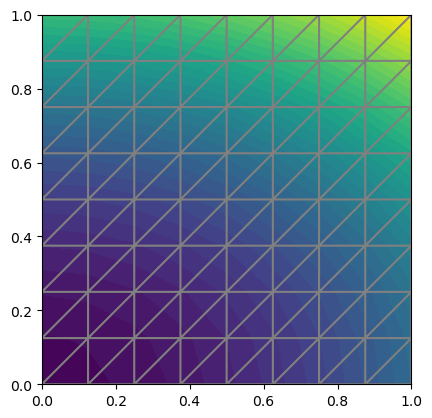

In [3]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

# A function to return wheather we are on the boundary 
def boundary(x, on_boundary):
    return on_boundary

# The homogeneous Dirichlet Boundary Condition
bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

print(type(u))
# Plot solution
u.rename('u', 'solution')
plot(u)
plot(mesh)

# Save solution to file in VTK format
vtkfile = File('poisson.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

# Hold plot
plt.savefig('poisson.png', bbox_inches='tight')
plt.show()

Solving linear variational problem.


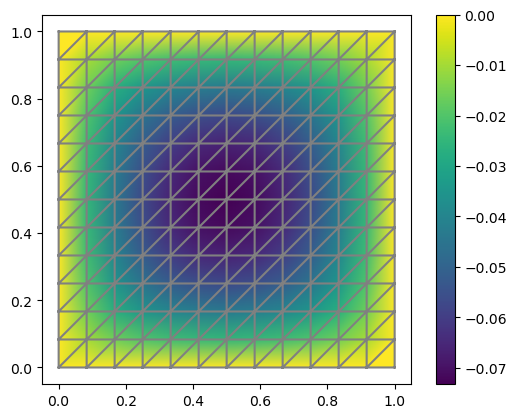

In [9]:
# https://www.youtube.com/watch?v=O7f8B2gPzSc&ab_channel=MachineLearning%26Simulation
from fenics import *
import matplotlib.pyplot as plt
N_POINTS_P_AXIS = 12
FORCING_MAGNITUDE = 1.0
# Mesh and Finite Element Discretization
mesh = UnitSquareMesh(N_POINTS_P_AXIS, N_POINTS_P_AXIS)
lagrange_polynomial_space_first_order = FunctionSpace(
    mesh,
    "Lagrange",  # "CG"
    1,
)
# Boundary Conditions
def boundary_boolean_function(x, on_boundary):
    return on_boundary
homogeneous_dirichlet_boundary_condition = DirichletBC(
    lagrange_polynomial_space_first_order,
    Constant(0.0),
    boundary_boolean_function,
)
# Trial and Test Functions
u_trial = TrialFunction(lagrange_polynomial_space_first_order)
v_test = TestFunction(lagrange_polynomial_space_first_order)
# Weak Form
forcing = Constant(- FORCING_MAGNITUDE)
weak_form_lhs = dot(grad(u_trial), grad(v_test)) * dx
weak_form_rhs = forcing * v_test * dx
# Finite Element Assembly and Linear System solve
u_solution = Function(lagrange_polynomial_space_first_order)
solve(
    weak_form_lhs == weak_form_rhs,
    u_solution,
    homogeneous_dirichlet_boundary_condition,
)
# Visualize
c = plot(u_solution, mode="color")
plt.colorbar(c)
plot(mesh)
plt.savefig('poisson.png', bbox_inches='tight')
plt.show()

## https://finite-element.github.io/